# Importing Necesary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

# Loading Dataset

In [4]:
from glob import glob
data = glob('breast-histopathology-images/**/*.png', recursive=True)

# Visualizing Sample Images

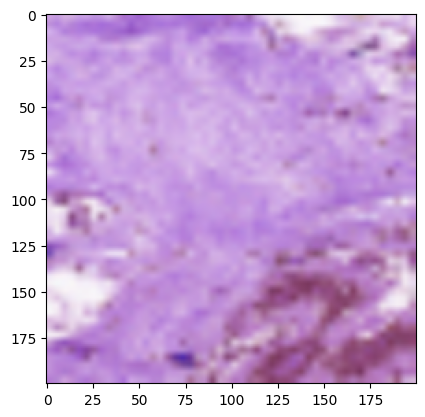

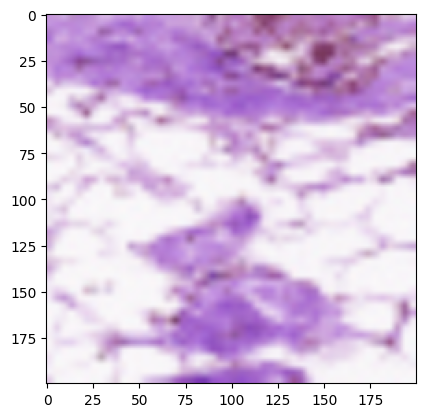

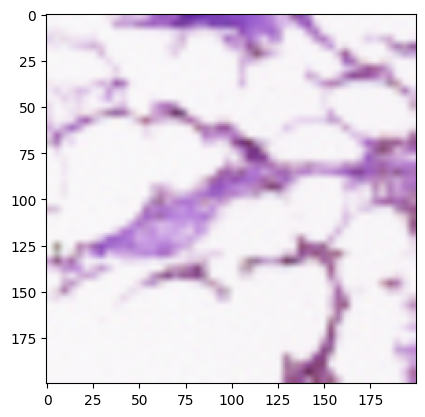

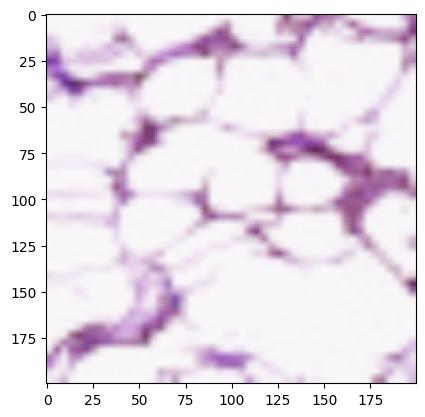

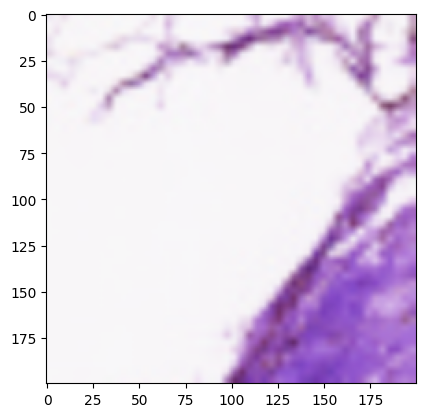

In [5]:
import cv2
import matplotlib.pyplot as plt
for i in data[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

# Preparing Image Data

In [6]:
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

# Preprocessing the image data

In [7]:
x=np.stack(images)

In [8]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [9]:
#normalize the data
x=x/255

# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Creating Model Architecture

In [10]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model = modelEfficientNetB0()
model.summary()

16705208/16705208 [==============================] - 39s 2us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


# Compiling the model

In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

c:\Users\ammar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Training the Model

In [12]:
history=model.fit(x,y,epochs=100,validation_split=0.4,batch_size=56)

Epoch 1/100
161/161 [==============================] - 740s 4s/step - loss: 0.5971 - acc: 0.7206 - val_loss: 0.8156 - val_acc: 0.1433
Epoch 2/100
161/161 [==============================] - 1055s 7s/step - loss: 0.4538 - acc: 0.8316 - val_loss: 0.7254 - val_acc: 0.3672
Epoch 3/100
161/161 [==============================] - 678s 4s/step - loss: 0.3734 - acc: 0.8579 - val_loss: 0.5817 - val_acc: 0.7835
Epoch 4/100
142/161 [=========================>....] - ETA: 1:06 - loss: 0.3235 - acc: 0.8735

# Plotting loss and accuracy

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

94/94 [==============================] - 2s 17ms/step - loss: 1.5648 - acc: 0.7537


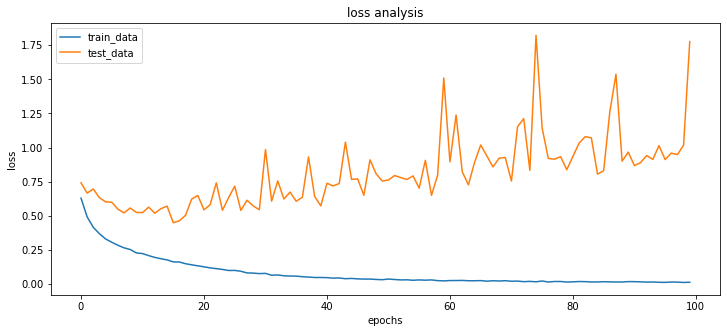

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

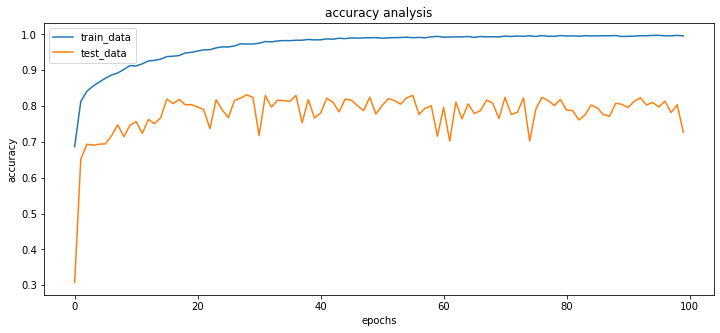

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()



# Making predictions

In [ ]:
IMG = Image.open('breast-histopathology-images/10253/0/10253_idx5_x1001_y1101_class0.png')
print(type(IMG))
IMG = IMG.resize((100, 100))
IMG = np.array(IMG)
print('po array = {}'.format(IMG.shape))
IMG = np.true_divide(IMG, 255)
IMG = IMG.reshape(-1,100, 100,3)
print(type(IMG), IMG.shape)
predictions = model.predict_classes(IMG)
print(model)
predictions_c = model.predict_classes(IMG)
print(predictions, predictions_c)
model.predict_classes(IMG)
model.predict(IMG)
print(predictions_c)

<class 'PIL.PngImagePlugin.PngImageFile'>
po array = (100, 100, 3)
<class 'numpy.ndarray'> (1, 100, 100, 3)
[0] [0]
[0]


In [ ]:
classes = {'TRAIN': ['Non Malignant (No Cancer)','Malignant'],
           'TEST': ['Non Malignant (No Cancer)','Malignant']}

predicted_class = classes['TRAIN'][predictions_c[0]]
print('We think that is {}.'.format(predicted_class.lower()))

We think that is non malignant (no cancer).


# Saving Model

In [ ]:
# Save the Model Weights
model.save_weights('_model_.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('_model_.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')

Model saved to the disk.


## Testing

In [2]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import model_from_json

# Load the saved model from disk
with open('md/_model_.json', 'r') as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)
model.load_weights('md/_model_.h5')

# Load and preprocess the test image
img_path = 'abc.jpg'
IMG = Image.open(img_path)
IMG = IMG.resize((100, 100))
IMG = np.array(IMG)
IMG = np.true_divide(IMG, 255)
IMG = IMG.reshape(-1, 100, 100, 3)

# Make a prediction
predictions = model.predict(IMG)
predicted_class = np.argmax(predictions)

# Map the predicted class index to the actual class label
classes = ['Non IDC', 'IDC']
predicted_label = classes[predicted_class]

print('The predicted class for the test image is:', predicted_label)


1/1 [==============================] - 2s 2s/step
The predicted class for the test image is: Non IDC
